<b> Consider the variables below.  The `xx` represents the miles under rush-hour traffic conditions whereas the `yy` represents the time in minutes to traverse those miles. </b> <br>

In [5]:
xx = [1, 3, 5, 8]
yy = [8, 20, 36, 70]

We are told to create our own dot product function similar to np.dot()

In [6]:
def dot(K, L):
    if len(K) != len(L):
        return 0
    return sum(i[0] * i[1] for i in zip(K, L))

In [7]:
# we test our dot function on an example
dot([1,4],[3,3])

15

In [49]:
# we use the OLS coefficient formula - for a coefficient with no intercept and only one feature
from __future__ import division
dot(xx,yy) / dot(xx,xx)

8.16161616161616

We now compare that value with that obtained via Python's statsmodels package: <br>

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
smf.OLS(yy,xx).fit().summary() # knowing that having only 4 observations throws a warning

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     302.4
Date:                Thu, 29 Dec 2016   Prob (F-statistic):           0.000414
Time:                        01:09:40   Log-Likelihood:                -11.265
No. Observations:                   4   AIC:                             24.53
Df Residuals:                       3   BIC:                             23.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             8.1616      0.469     17.391      0.000         6.668     9.655
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.671
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.479
Skew:                           0.530   Prob(JB):                        0.787
Kurtosis:                       1.677   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# We observe that the statsmodel regression corroborates the dot product above
# Below we predict at 10 miles given the assignment at hand
sm.OLS(yy,xx).fit().predict(10)[0]

81.616161616161605

Note that adding a constant yields an incorrect solution for the stated problem at hand since time travel would be possible (at time 0 you would have an arrival forecast in negative minutes)

In [54]:
# Do not therefore add the constant as per below

from statsmodels.api import add_constant
xx = add_constant(xx) # you can inspect xx to verify the addition of the intercept
sm.OLS(yy,xx, ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     95.44
Date:                Thu, 29 Dec 2016   Prob (F-statistic):             0.0103
Time:                        01:24:40   Log-Likelihood:                -10.497
No. Observations:                   4   AIC:                             24.99
Df Residuals:                       2   BIC:                             23.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.3925      4.540     -0.967      0.435       -23.928    15.143
x1             8.9159      0.913      9.769      0.010         4.989    12.843
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.019
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.576
Skew:                          -0.105   Prob(JB):                        0.750
Kurtosis:                       1.153   Cond. No.                         9.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Note:  The scipy and numpy versions below includes the intercept by default:

xx = [1, 3, 5, 8] # we need a 1d vector here and I remove the add_constant from above
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)
print slope

8.91588785047


In [66]:
import numpy as np
miles= xx
time = yy
np.polyfit(miles,time, 1) 
# where the '1' refers to the degree of the fitting polynomial (not the degrees of freedom)

array([ 8.91588785, -4.39252336])

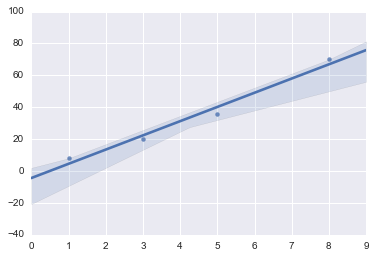

In [69]:
# seaborn also assumes an intercept
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

dist = np.array([1,3,5,8])
time = np.array([8,20,36,70])

sns.regplot(dist,time) # seaborn conveniently has the fit and scatter in one 